In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Solution (i) -  Data cleaning

In the below code, the following was implemented for data cleaning:

* Missing Numerical Values were replaced by the median in the column.
* Some data points in Infant deaths & Measles (calculated per 1000 population) were seen to be > 1000. Such incorrect values were capped to 1000.
* Status was changed to type 'category' & Country was changed to type 'str'





In [ ]:
filename = "drive/MyDrive/hw2.csv"
df = pd.read_csv(filename)
df.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Income composition of resources
0,Afghanistan,2015,Low/Middle Income,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,6.0,8.16,584.259210,33736494.0,17.2,17.3,0.479
1,Afghanistan,2014,Low/Middle Income,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,58.0,8.18,612.696514,327582.0,17.5,17.5,0.476
2,Afghanistan,2013,Low/Middle Income,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,62.0,8.13,631.744976,31731688.0,17.7,17.7,0.470
3,Afghanistan,2012,Low/Middle Income,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,67.0,8.52,669.959000,3696958.0,17.9,18.0,0.463
4,Afghanistan,2011,Low/Middle Income,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,68.0,7.87,63.537231,2978599.0,18.2,18.2,0.454
5,Afghanistan,2010,Low/Middle Income,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,66.0,9.20,553.328940,2883167.0,18.4,18.4,0.448
6,Afghanistan,2009,Low/Middle Income,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,63.0,9.42,445.893298,284331.0,18.6,18.7,0.434
7,Afghanistan,2008,Low/Middle Income,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,64.0,8.33,373.361116,2729431.0,18.8,18.9,0.433
8,Afghanistan,2007,Low/Middle Income,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,63.0,6.73,369.835796,26616792.0,19.0,19.1,0.415
9,Afghanistan,2006,Low/Middle Income,57.3,295.0,84,0.03,17.171518,64.0,1990,14.7,58.0,7.43,272.563770,2589345.0,19.2,19.3,0.405


In [ ]:
df.describe()

,Year,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Income composition of resources
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2919.000000,2712.00000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,82.550188,5.93819,7483.158469,1.275338e+07,4.839704,4.870317,0.627551
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,23.428046,2.49832,14270.169342,6.101210e+07,4.420195,4.508882,0.210904
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,3.000000,0.37000,1.681350,3.400000e+01,0.100000,0.100000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,78.000000,4.26000,463.935626,1.957932e+05,1.600000,1.500000,0.493000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,93.000000,5.75500,1766.947595,1.386542e+06,3.300000,3.300000,0.677000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,97.000000,7.49250,5910.806335,7.420359e+06,7.200000,7.200000,0.779000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,99.000000,17.60000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000


In [ ]:
print(len(df[df['Infant deaths'] > 1000]))
print(len(df[df['Measles '] > 1000]))

13
525


In [ ]:
df['Infant deaths'] = df['Infant deaths'].apply(lambda x: min(x, 1000))
df['Measles '] = df['Measles '].apply(lambda x: min(x, 1000))
df.describe()

,Year,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Income composition of resources
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2919.000000,2712.00000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000
mean,2007.518720,69.224932,164.796448,28.261743,4.602861,738.251295,80.940461,251.769912,38.321247,82.550188,5.93819,7483.158469,1.275338e+07,4.839704,4.870317,0.627551
std,4.613841,9.523867,124.292079,93.498663,4.052413,1987.914858,25.070016,388.004498,20.044034,23.428046,2.49832,14270.169342,6.101210e+07,4.420195,4.508882,0.210904
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,3.000000,0.37000,1.681350,3.400000e+01,0.100000,0.100000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,78.000000,4.26000,463.935626,1.957932e+05,1.600000,1.500000,0.493000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,93.000000,5.75500,1766.947595,1.386542e+06,3.300000,3.300000,0.677000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,97.000000,7.49250,5910.806335,7.420359e+06,7.200000,7.200000,0.779000
max,2015.000000,89.000000,723.000000,1000.000000,17.870000,19479.911610,99.000000,1000.000000,87.300000,99.000000,17.60000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000


In [ ]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
Infant deaths,0
Alcohol,194
Percentage expenditure,0
Hepatitis B,553
Measles,0


In [ ]:
#List all the columns that have missing values
missing_cols = df.columns[df.isnull().any()]

# Fill missing continuous variables with median values
for col in missing_cols:
    df.fillna(df[col].median(), inplace=True)

df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
Infant deaths,0
Alcohol,0
Percentage expenditure,0
Hepatitis B,0
Measles,0


In [ ]:
df["Country"] = df["Country"].astype(str)
df["Status"] = df["Status"].astype('category')
df.dtypes

,0
Country,object
Year,int64
Status,category
Life expectancy,float64
Adult Mortality,float64
Infant deaths,int64
Alcohol,float64
Percentage expenditure,float64
Hepatitis B,float64
Measles,int64


# Solution (ii) - Data Exploration

After plotting the Correlation matrix, the following features were found to be strongly correlated with each other ( |correlation| > 0.5 ):

* Thinness 10-19 years and Thinness 5-9 years
* Alcohol and Total expenditure
* Life expectancy  and Adult Mortality
* Infant deaths and Population
* Life expectancy  and BMI
* Percentage expenditure and GDP

Here’s a brief explanation of the implications of each strongly correlated pair:

* **Thinness 10-19 years and Thinness 5-9 years**: A higher prevalence of thinness in adolescents (10-19 years) is associated with a similar trend in younger children (5-9 years), suggesting nutrition issues.

* **Alcohol and Total expenditure**: Countries that spend more on health care tend to have higher alcohol consumption, indicating a possible link between economic resources and lifestyle choices related to health.

* **Life expectancy and Adult Mortality**: Lower adult mortality rates are strongly associated with higher life expectancy, implying that improved health in adults significantly contributes to overall life expectancy in a population.

* **Infant deaths and Population**: Higher infant mortality rates tend to correlate with larger populations, which may indicate challenges in health care access or quality in more densely populated areas.

* **Life expectancy and BMI**: Higher body mass index (BMI) is often associated with increased life expectancy, suggesting that better nutrition and healthier body weight may contribute positively to longevity.

* **Percentage expenditure and GDP**: A higher percentage of health expenditure relative to GDP suggests that wealthier nations tend to allocate more resources toward health care, which may enhance health outcomes and access to medical services.

Yes, this is according to my expectations. Although the Alcohol correlation came as a surprise to me.









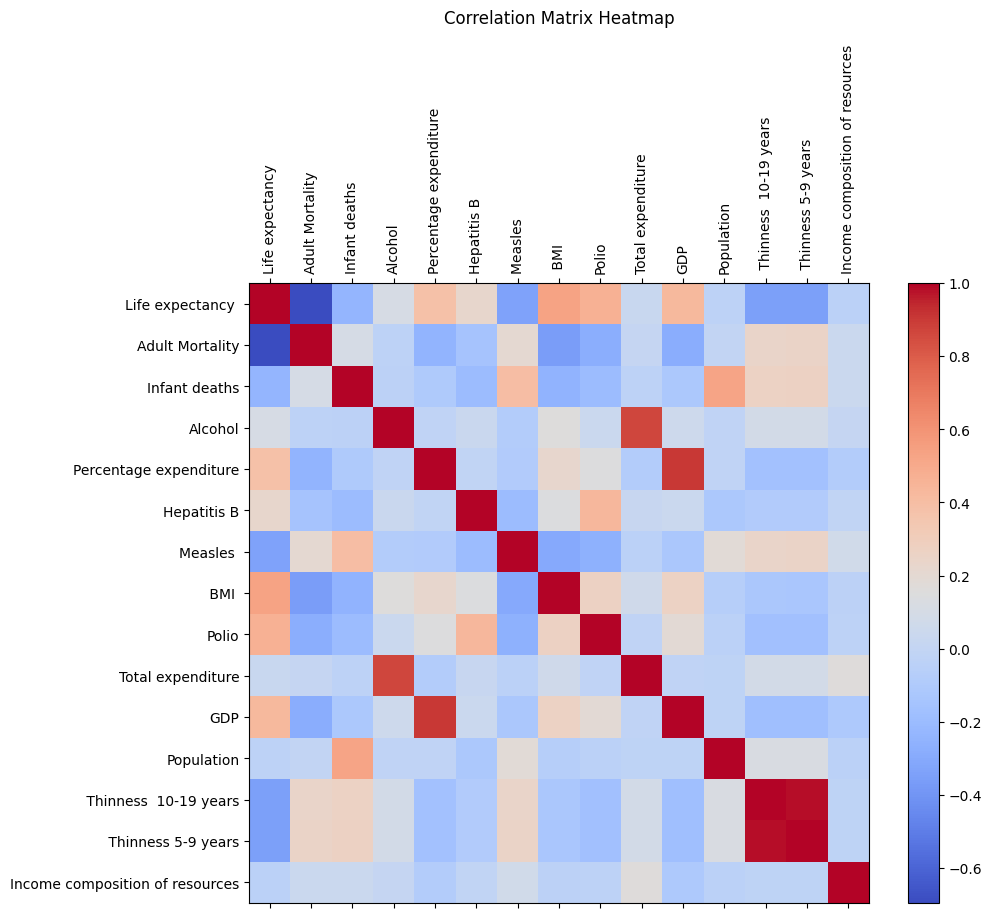


Strongly correlated pairs are as follows (With a absolute value of correlation > 0.5):

 Thinness  10-19 years and  Thinness 5-9 years
Alcohol and Total expenditure
Life expectancy  and Adult Mortality
Infant deaths and Population
Life expectancy  and  BMI 
Percentage expenditure and GDP


In [ ]:
numerical_columns = df.columns[3:]

# Compute the pearson correlation matrix
correlation_matrix = df[numerical_columns].corr(method='pearson')

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()

# Set x and y ticks
plt.xticks(ticks=np.arange(len(numerical_columns)), labels=numerical_columns, rotation=90)
plt.yticks(ticks=np.arange(len(numerical_columns)), labels=numerical_columns)

# Display the heatmap
plt.title("Correlation Matrix Heatmap", pad=15)
plt.show()

# Set of pairs with |correlation| > 0.5
strongly_correlated_pairs = set()

# Iterate over the correlation matrix to find pairs
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            strongly_correlated_pairs.add((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Output the set of strongly correlated pairs
print("\nStrongly correlated pairs are as follows (With a absolute value of correlation > 0.5):\n")
for pair in strongly_correlated_pairs:
    print(pair[0], "and", pair[1])

# Solution (iii) - Predicting Life expectancy

The reported values of the metrics using OLS closed form solution is:

* Training Set: R² = 0.579, Pearson r = 0.761, MAE = 4.837
* Testing Set: R² = 0.451, Pearson r = 0.684, MAE = 4.991
* Development Set: R² = 0.430, Pearson r = 0.663, MAE = 5.757

In [ ]:
# Select the relevant features and the target variable (Life expectancy)
features = list(df.columns[1:3]) + list(df.columns[6:])
target = df.columns[3]

# Convert 'Status' to one-hot encoded categorical variables
data = pd.get_dummies(df, columns=['Status'], drop_first=True)

# Change Status to one-hot encoded column name
features[1] = data.columns[-1]

# Prepare the feature matrix X and the target vector y
X = data[features].values
y = data[target].values

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Add an intercept column (bias term) to the normalized X
X_normalized = np.hstack([np.ones((X_normalized.shape[0], 1)), X_normalized])

# Split data into train, test, and dev sets based on provided indices
X_train, y_train = X_normalized[:2048], y[:2048]
X_test, y_test = X_normalized[2049:2714], y[2049:2714]
X_dev, y_dev = X_normalized[2714:], y[2714:]

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Development set shape:", X_dev.shape)

# Compute the OLS closed-form solution for the weights using the training set
X_train_T = X_train.T
w_star = np.linalg.inv(X_train_T @ X_train) @ (X_train_T @ y_train)

# 7. Make predictions on both the training, testing, and dev sets
y_train_pred = X_train @ w_star
y_test_pred = X_test @ w_star
y_dev_pred = X_dev @ w_star

# Evaluate the model: R², Pearson’s correlation (r), and MAE for all three sets

# R²
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
r2_dev = r2_score(y_dev, y_dev_pred)

# Pearson correlation coefficient
pearson_train = pearsonr(y_train, y_train_pred)[0]
pearson_test = pearsonr(y_test, y_test_pred)[0]
pearson_dev = pearsonr(y_dev, y_dev_pred)[0]

# Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mae_dev = mean_absolute_error(y_dev, y_dev_pred)

# 9. Print out the evaluation metrics
print(f"Training Set: R² = {r2_train:.3f}, Pearson r = {pearson_train:.3f}, MAE = {mae_train:.3f}")
print(f"Testing Set: R² = {r2_test:.3f}, Pearson r = {pearson_test:.3f}, MAE = {mae_test:.3f}")
print(f"Development Set: R² = {r2_dev:.3f}, Pearson r = {pearson_dev:.3f}, MAE = {mae_dev:.3f}")


Training set shape: (2048, 15)
Testing set shape: (665, 15)
Development set shape: (224, 15)
Training Set: R² = 0.579, Pearson r = 0.761, MAE = 4.837
Testing Set: R² = 0.451, Pearson r = 0.684, MAE = 4.991
Development Set: R² = 0.430, Pearson r = 0.663, MAE = 5.757


# Solution (iv) - Analysis of the weight matrix

How might these findings support public health officials in making informed decisions?

* **BMI (Positive Impact, Coefficient = 3.08)**: A higher BMI correlates with increased life expectancy, suggesting that improving nutrition and promoting healthier lifestyles could enhance public health.

* **Thinness 10-19 Years (Negative Impact, Coefficient = -2.50)**: Malnutrition in adolescence negatively impacts life expectancy. Need to combat malnutrition.

* **Status (Upper/High Income, Positive Impact, Coefficient = 1.85)**: Higher income countries tend to have longer life expectancies, reflecting the benefits of economic stability.

* **GDP (Positive Impact, Coefficient = 1.49)**:Economic growth is linked to better health outcomes. Need to improve economic disparities.

* **Total Health Expenditure (Positive Impact, Coefficient = 1.20)**:
Higher healthcare spending positively affects life expectancy. Goal is to focus more budget on health.

* **Alcohol Consumption (Negative Impact, Coefficient = -1.01)**: Excessive alcohol use reduces life expectancy. Need to educate the public about the health risks of alcohol.

How could this model and its outcomes be utilized to educate the public?

* **Promote Healthy Nutrition**: Highlight the importance of balanced diets and preventing malnutrition to improve life expectancy.

* **Raise Awareness of Alcohol Risks**: Use the model's findings to educate about the harmful effects of alcohol on life expectancy.

* **Support Economic Growth and Healthcare**: Show how economic development and healthcare investment improve life expectancy, fostering public support for related policies.

In [ ]:
# Extract coefficients (including the intercept)
coefficients = np.hstack([w_star[0], w_star[1:]])

coef_df = pd.DataFrame({
    'Feature': ['Intercept'] + features,
    'Coefficient': coefficients
})

# Most impactful factors
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print("\nCoefficients sorted by impact:")
print(coef_df[['Feature', 'Coefficient']])


Coefficients sorted by impact:
                            Feature  Coefficient
0                         Intercept    69.126359
7                              BMI      3.077137
12            Thinness  10-19 years    -2.503668
8                             Polio     2.297792
2          Status_Upper/High Income     1.852318
10                              GDP     1.494428
9                 Total expenditure     1.202102
14  Income composition of resources    -1.068568
3                           Alcohol    -1.013888
1                              Year     0.732911
6                          Measles     -0.595685
11                       Population     0.521593
13               Thinness 5-9 years     0.479288
4            Percentage expenditure     0.190699
5                       Hepatitis B     0.092996


# Solution (v) - Best Feature Set & Best Model (Linear/ Non Linear)

Based on the strongly correlated features calculated in (ii), I generated six sets to reduce collinearity and unwanted features, they are as below:

* set1 = ['Year', 'Status', ' BMI ', 'Adult Mortality']
* set2 = ['Year', 'Status', ' BMI ', 'Adult Mortality', 'Alcohol', 'Percentage expenditure', ' Thinness  10-19 years']
* set3 = ['Year', 'Status', ' BMI ', 'Adult Mortality', 'Population', 'Alcohol', 'Percentage expenditure', ' Thinness  10-19 years']
* set4 = ['Year', 'Status', ' BMI ', 'Adult Mortality', 'Population', 'Total expenditure', 'GDP', ' Thinness  10-19 years', 'Income composition of resources']
* set5 = ['Year', 'Status', ' BMI ', 'Adult Mortality', 'Population', 'Alcohol', 'Total expenditure', 'Hepatitis B', 'Polio', ' Thinness  10-19 years']
* set6 = ['Year', 'Status', 'Adult Mortality', 'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'Polio', ' Thinness  10-19 years', 'Income composition of resources']

Then, I calculate the MAE on these sets using the following mix of linear and non linear regression models: Linear regression, Ridge Regression, Lasso regression, Decision Tree, Random Forest

After the dev set evaluation:

* **Best Model** - Random Forest
* **Best Set** - Set 6

Set 6 has features which might have hidden relations with 'Life expectancy' as well one of each strongly correlated features and features strongly correlated with 'Life expectancy' which might be the reason for it becoming the best set!

**MAE on Test Set with Random Forest and Set6**: 2.0513




In [ ]:
# Feature sets based on correlation results
set1 = ['Year', 'Status', ' BMI ', 'Adult Mortality']
set2 = ['Year', 'Status', ' BMI ', 'Adult Mortality', 'Alcohol', 'Percentage expenditure', ' Thinness  10-19 years']
set3 = ['Year', 'Status', ' BMI ', 'Adult Mortality', 'Population', 'Alcohol', 'Percentage expenditure', ' Thinness  10-19 years']
set4 = ['Year', 'Status', ' BMI ', 'Adult Mortality', 'Population', 'Total expenditure', 'GDP', ' Thinness  10-19 years', 'Income composition of resources']
set5 = ['Year', 'Status', ' BMI ', 'Adult Mortality', 'Population', 'Alcohol', 'Total expenditure', 'Hepatitis B', 'Polio', ' Thinness  10-19 years']
set6 = ['Year', 'Status', 'Adult Mortality', 'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'Polio', ' Thinness  10-19 years', 'Income composition of resources']

# Feature sets to test
feature_sets = [set1, set2, set3, set4, set5, set6]
feature_set_names = ['Set1', 'Set2', 'Set3', 'Set4', 'Set5', 'Set6']

# Models to test
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.01),
    'Decision Tree': DecisionTreeRegressor(max_depth=5),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=7, random_state=42)
}

# Target variable
target = 'Life expectancy '

# Convert categorical variables to one-hot encoding
data = pd.get_dummies(df, columns=['Status'], drop_first=True)

# Split into train, dev, and test sets (based on provided indices)
train_data = data[:2048]
dev_data = data[2049:2714]
test_data = data[2714:]

#Rename Status Column
set1[1] = data.columns[-1]
set2[1] = data.columns[-1]
set3[1] = data.columns[-1]
set4[1] = data.columns[-1]
set5[1] = data.columns[-1]
set6[1] = data.columns[-1]

# Function to test different models and feature sets
def test_models_on_feature_sets(X_train, y_train, X_dev, y_dev, feature_sets, models):
    best_model = None
    best_set = None
    best_mae = float('inf')
    results = []

    for i, features in enumerate(feature_sets):
        print(f"\nEvaluating Feature Set {i+1} ({feature_set_names[i]})")

        # Select the corresponding features for the current set
        X_train_fs = X_train[features]
        X_dev_fs = X_dev[features]

        # Standardize the features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_fs)
        X_dev_scaled = scaler.transform(X_dev_fs)

        # Iterate over models
        for model_name, model in models.items():
            # Train the model
            model.fit(X_train_scaled, y_train)

            # Make predictions on dev set
            y_dev_pred = model.predict(X_dev_scaled)

            # Calculate MAE
            mae = mean_absolute_error(y_dev, y_dev_pred)
            results.append((model_name, feature_set_names[i], mae))

            # Print MAE for this model and feature set
            print(f"Model: {model_name}, MAE: {mae:.4f}")

            # Track the best combination of model and feature set
            if mae < best_mae:
                best_mae = mae
                best_model = model_name
                best_set = feature_set_names[i]

    return best_model, best_set, best_mae, results

# Prepare data for training and testing
X_train = train_data.drop(columns=[target])
y_train = train_data[target]
X_dev = dev_data.drop(columns=[target])
y_dev = dev_data[target]

# Evaluate models and feature sets on the development set
best_model, best_set, best_mae, results = test_models_on_feature_sets(X_train, y_train, X_dev, y_dev, feature_sets, models)

# Print the best combination of model and feature set on the dev set
print(f"\nBest Model: {best_model}")
print(f"Best Feature Set: {best_set}")
print(f"Best MAE on Dev Set: {best_mae:.4f}")

# If the best combination is found, now evaluate it on the test set
if best_model and best_set:
    print("\nEvaluating the best model on the test set...")

    # Prepare the test set with the best feature set
    X_test = test_data[feature_sets[feature_set_names.index(best_set)]]
    X_dev_fs = X_dev[feature_sets[feature_set_names.index(best_set)]]

    # Standardize the test set using the same scaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[feature_sets[feature_set_names.index(best_set)]])
    X_test_scaled = scaler.transform(X_test)

    # Train the best model on the full training + dev set and evaluate on the test set
    final_model = models[best_model]
    X_full_train = np.vstack([X_train_scaled, X_dev_fs])
    y_full_train = np.concatenate([y_train, y_dev])

    final_model.fit(X_full_train, y_full_train)

    # Predict on test set
    y_test_pred = final_model.predict(X_test_scaled)

    # Evaluate on the test set
    y_test = test_data[target]
    mae_test = mean_absolute_error(y_test, y_test_pred)
    print(f"MAE on Test Set with {best_model} and {best_set}: {mae_test:.4f}")



Evaluating Feature Set 1 (Set1)
Model: Linear Regression, MAE: 4.3150
Model: Ridge, MAE: 4.3150
Model: Lasso, MAE: 4.3132
Model: Decision Tree, MAE: 2.9441
Model: Random Forest, MAE: 2.3889

Evaluating Feature Set 2 (Set2)
Model: Linear Regression, MAE: 4.0417
Model: Ridge, MAE: 4.0417
Model: Lasso, MAE: 4.0377
Model: Decision Tree, MAE: 2.8953
Model: Random Forest, MAE: 2.3539

Evaluating Feature Set 3 (Set3)
Model: Linear Regression, MAE: 4.0781
Model: Ridge, MAE: 4.0782
Model: Lasso, MAE: 4.0720
Model: Decision Tree, MAE: 2.9220
Model: Random Forest, MAE: 2.3794

Evaluating Feature Set 4 (Set4)
Model: Linear Regression, MAE: 4.1291
Model: Ridge, MAE: 4.1291
Model: Lasso, MAE: 4.1205
Model: Decision Tree, MAE: 2.5543
Model: Random Forest, MAE: 2.0057

Evaluating Feature Set 5 (Set5)
Model: Linear Regression, MAE: 3.9570
Model: Ridge, MAE: 3.9571
Model: Lasso, MAE: 3.9509
Model: Decision Tree, MAE: 3.5810
Model: Random Forest, MAE: 2.6029

Evaluating Feature Set 6 (Set6)
Model: Linea

# Solution (vi) - Logistic Regression on binarized Life expectancy

After binarizing Life expectancy, hyperparameter conditions considered were:

* C_values = [0.01, 0.1, 1, 10, 100]
* penalties = ['l1', 'l2']

After evaluation of each combination of Logistic Regression on the dev set, the best combination was found to be C = 1 & penalty = l1.

* **Best Parameters**: C = 1, Penalty = l1
* **Best Development Set Accuracy**: 0.8466
* **Test Set Accuracy**: 0.7857

In [ ]:
# Binarize the Life expectancy outcome
mean_life_expectancy = df['Life expectancy '].mean()
df['Life_expectancy_class'] = np.where(df['Life expectancy '] > mean_life_expectancy, 1, -1)

# Split the data into features and target variable
X = df.drop(columns=['Life expectancy ', 'Life_expectancy_class', 'Country'])
y = df['Life_expectancy_class']

# Convert 'Status' to one-hot encoding
X = pd.get_dummies(X, columns=['Status'], drop_first=True)

# Split into train, dev, and test sets
X_train = X[:2048]
y_train = y[:2048]
X_dev = X[2049:2714]
y_dev = y[2049:2714]
X_test = X[2714:]
y_test = y[2714:]

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_dev_scaled = scaler.transform(X_dev)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter combinations
C_values = [0.01, 0.1, 1, 10, 100]
penalties = ['l1', 'l2']

best_accuracy = 0
best_params = {'C': None, 'penalty': None}

# Iterate through each combination of hyperparameters
for C in C_values:
    for penalty in penalties:
        # Train the logistic regression model
        log_reg = LogisticRegression(C=C, penalty=penalty, solver='liblinear')
        log_reg.fit(X_train_scaled, y_train)

        # Evaluate the model on the development set
        y_dev_pred = log_reg.predict(X_dev_scaled)
        dev_accuracy = accuracy_score(y_dev, y_dev_pred)

        # Check if the current model is the best
        if dev_accuracy > best_accuracy:
            best_accuracy = dev_accuracy
            best_params['C'] = C
            best_params['penalty'] = penalty

# Report the best hyperparameters
print(f"Best Parameters: C = {best_params['C']}, Penalty = {best_params['penalty']}")
print(f"Best Development Set Accuracy: {best_accuracy:.4f}")

# Train final best model on the training set
best_log_reg = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'], solver='liblinear')
best_log_reg.fit(X_train_scaled, y_train)

# Evaluate on the test set
y_test_pred = best_log_reg.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Set Accuracy: {test_accuracy:.4f}")

Best Parameters: C = 1, Penalty = l1
Best Development Set Accuracy: 0.8466
Test Set Accuracy: 0.7857


In [ ]:
# Convert categorical variables to one-hot encoding
data = pd.get_dummies(df, columns=['Status'], drop_first=True)

# Splitting the dataset based on 'Status'
low_medium_income = data[data['Status_Upper/High Income'] == 0]
upper_high_income = data[data['Status_Upper/High Income'] == 1]

# Display the shapes of the resulting datasets
print(f"Low/Medium Income Dataset Shape: {low_medium_income.shape}")
print(f"Upper/High Income Dataset Shape: {upper_high_income.shape}")

# Drop unwanted columns
low_medium_income = low_medium_income.drop(columns=['Life_expectancy_class', 'Status_Upper/High Income'])
upper_high_income = upper_high_income.drop(columns=['Life_expectancy_class', 'Status_Upper/High Income'])

# Reset indices
low_medium_income.reset_index(drop=True, inplace=True)
upper_high_income.reset_index(drop=True, inplace=True)

Low/Medium Income Dataset Shape: (2426, 19)
Upper/High Income Dataset Shape: (512, 19)


# Solution (vii) - Evaluate (ii) and (v) and two datasets - Low Income dataset & High Income dataset

After splitting the dataset and computing the correlation matrix, the following strong correlations were observed for Low Income and High Income datsets:

**Low Income Datset - Strong Correlations**

* Thinness  10-19 years and  Thinness 5-9 years
* Alcohol and Total expenditure
* Life expectancy  and Adult Mortality
* Infant deaths and Population
* Life expectancy  and  BMI
* Percentage expenditure and GDP

**High Income Datset - Strong Correlations**

* Infant deaths and Income composition of resources
* Thinness  10-19 years and  Thinness 5-9 years
* Life expectancy  and  Thinness 5-9 years
* Life expectancy  and  Thinness  10-19 years
* Percentage expenditure and GDP
* Alcohol and Total expenditure

Here is the Inference:

* The correlations portray varying socio-economic, healthcare, and nutritional conditions. In low-income countries, correlations like life expectancy with adult mortality and BMI reflect struggles with basic healthcare access, malnutrition, and preventable deaths.

* Large populations and high infant mortality also suggest resource constraints. On the other hand, in high-income countries, correlations involving thinness and life expectancy indicate that health issues stem more from lifestyle factors, such as nutrition and chronic diseases.

* Additionally, stronger resource utilization (ICOR) in high-income nations correlates with lower infant mortality, highlighting better healthcare infrastructure. These disparities reflect how economic development shapes public health challenges differently across income groups.

Results of replication of (v) continued after correlation matrix code blocks.

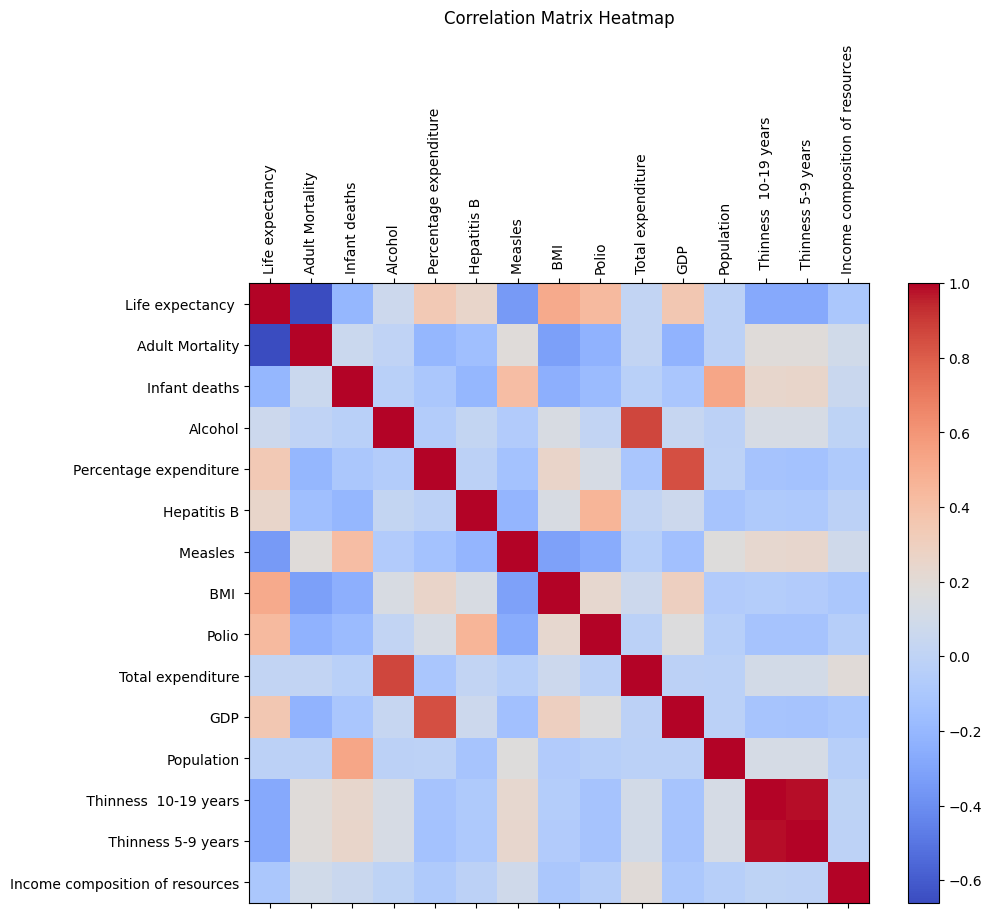


Strongly correlated pairs are as follows (With a absolute value of correlation > 0.5):

 Thinness  10-19 years and  Thinness 5-9 years
Alcohol and Total expenditure
Life expectancy  and Adult Mortality
Infant deaths and Population
Life expectancy  and  BMI 
Percentage expenditure and GDP


In [ ]:
# Compute the Correlation matrix for Low/Medium Income datset

numerical_columns = low_medium_income.columns[2:]

# Compute the pearson correlation matrix
correlation_matrix = low_medium_income[numerical_columns].corr(method='pearson')

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()

# Set x and y ticks
plt.xticks(ticks=np.arange(len(numerical_columns)), labels=numerical_columns, rotation=90)
plt.yticks(ticks=np.arange(len(numerical_columns)), labels=numerical_columns)

# Display the heatmap
plt.title("Correlation Matrix Heatmap", pad=15)
plt.show()

# Set of pairs with |correlation| > 0.5
strongly_correlated_pairs = set()

# Iterate over the correlation matrix to find pairs
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            strongly_correlated_pairs.add((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Output the set of strongly correlated pairs
print("\nStrongly correlated pairs are as follows (With a absolute value of correlation > 0.5):\n")
for pair in strongly_correlated_pairs:
    print(pair[0], "and", pair[1])

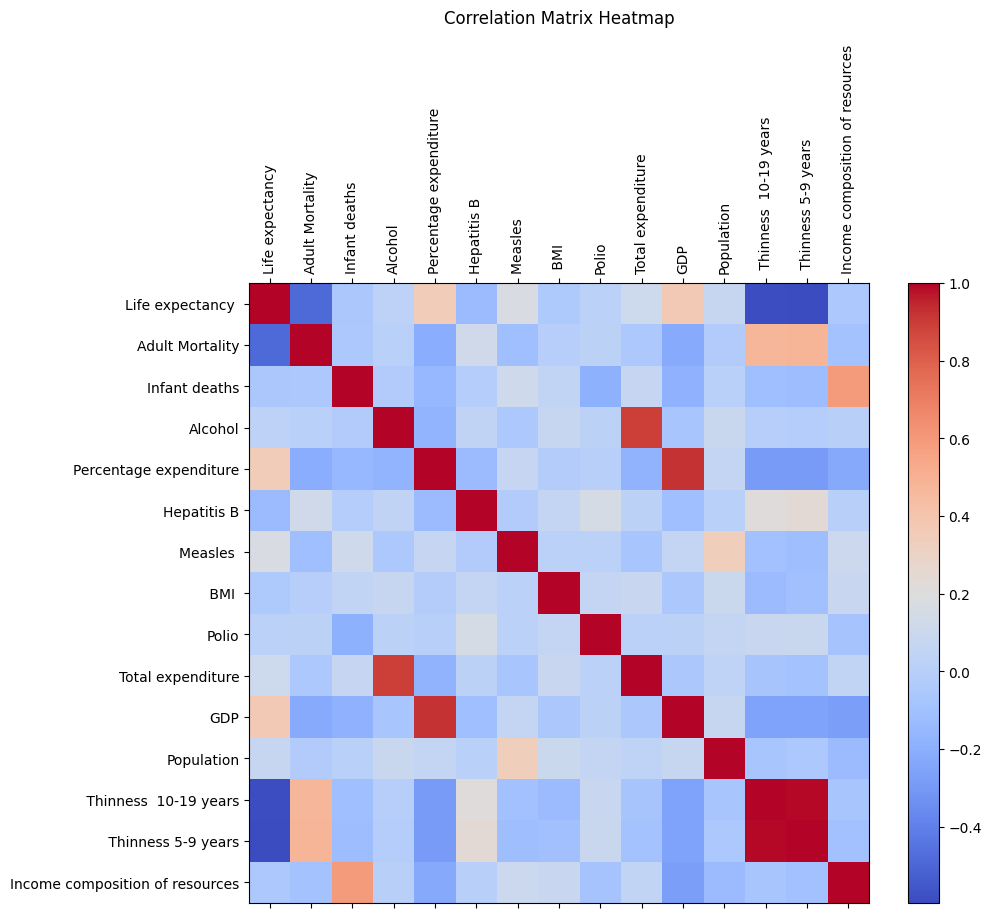


Strongly correlated pairs are as follows (With a absolute value of correlation > 0.5):

Infant deaths and Income composition of resources
 Thinness  10-19 years and  Thinness 5-9 years
Life expectancy  and  Thinness 5-9 years
Life expectancy  and  Thinness  10-19 years
Percentage expenditure and GDP
Alcohol and Total expenditure


In [ ]:
# Compute the Correlation matrix for Upper/High Income datset

numerical_columns = upper_high_income.columns[2:]

# Compute the pearson correlation matrix
correlation_matrix = upper_high_income[numerical_columns].corr(method='pearson')

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()

# Set x and y ticks
plt.xticks(ticks=np.arange(len(numerical_columns)), labels=numerical_columns, rotation=90)
plt.yticks(ticks=np.arange(len(numerical_columns)), labels=numerical_columns)

# Display the heatmap
plt.title("Correlation Matrix Heatmap", pad=15)
plt.show()

# Set of pairs with |correlation| > 0.5
strongly_correlated_pairs = set()

# Iterate over the correlation matrix to find pairs
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            strongly_correlated_pairs.add((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Output the set of strongly correlated pairs
print("\nStrongly correlated pairs are as follows (With a absolute value of correlation > 0.5):\n")
for pair in strongly_correlated_pairs:
    print(pair[0], "and", pair[1])

**Low Income Dataset**

Based on the strongly correlated features calculated previously, I generated six sets to reduce collinearity and unwanted features, they are as below:

* set1 = ['Year', ' BMI ', 'Adult Mortality']

* set2 = ['Year', ' BMI ', 'Adult Mortality', 'Alcohol', 'Percentage expenditure', ' Thinness  10-19 years']

* set3 = ['Year', ' BMI ', 'Adult Mortality', 'Population', 'Alcohol', 'Percentage expenditure', ' Thinness  10-19 years']

* set4 = ['Year', ' BMI ', 'Adult Mortality', 'Population', 'Total expenditure', 'GDP', ' Thinness  10-19 years', 'Income composition of resources']

* set5 = ['Year', ' BMI ', 'Adult Mortality', 'Population', 'Alcohol', 'Total expenditure', 'Hepatitis B', 'Polio', ' Thinness  10-19 years']

* set6 = ['Year', 'Adult Mortality', 'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'Polio', ' Thinness  10-19 years', 'Income composition of resources']

Then, I calculated the MAE on these sets using the following mix of linear and non linear regression models: Linear regression, Ridge Regression, Lasso regression, Decision Tree, Random Forest

After the dev set evaluation:

* **Best Model** - Random Forest
* **Best Set** - Set 6

**MAE on Test Set with Random Forest and Set6**: 1.6692

In [ ]:
'''
Models (linear & non linear) are loaded earlier for Question (v) along with the function to calculate
the best comination of model and feature set evaluated using mae on dev set.
'''

# Feature sets based on low income datset correlation results
set1 = ['Year', ' BMI ', 'Adult Mortality']
set2 = ['Year', ' BMI ', 'Adult Mortality', 'Alcohol', 'Percentage expenditure', ' Thinness  10-19 years']
set3 = ['Year', ' BMI ', 'Adult Mortality', 'Population', 'Alcohol', 'Percentage expenditure', ' Thinness  10-19 years']
set4 = ['Year', ' BMI ', 'Adult Mortality', 'Population', 'Total expenditure', 'GDP', ' Thinness  10-19 years', 'Income composition of resources']
set5 = ['Year', ' BMI ', 'Adult Mortality', 'Population', 'Alcohol', 'Total expenditure', 'Hepatitis B', 'Polio', ' Thinness  10-19 years']
set6 = ['Year', 'Adult Mortality', 'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'Polio', ' Thinness  10-19 years', 'Income composition of resources']

# Feature sets to test
feature_sets = [set1, set2, set3, set4, set5, set6]
feature_set_names = ['Set1', 'Set2', 'Set3', 'Set4', 'Set5', 'Set6']

# Target variable
target = 'Life expectancy '

'''
Provided indices in the doc are not useful. South Africa is not present in higher income datset.
So we will do a (80,10,10) split for train, dev, test.
'''

# First, split into 80% training and 20%
train_df, temp_df = train_test_split(low_medium_income, test_size=0.2, random_state=42)

# Now, split the remaining 20% into 10% validation and 10% test
dev_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Prepare data for training and testing
X_train = train_df.drop(columns=[target])
y_train = train_df[target]
X_dev = dev_df.drop(columns=[target])
y_dev = dev_df[target]

# Evaluate models and feature sets on the development set
best_model, best_set, best_mae, results = test_models_on_feature_sets(X_train, y_train, X_dev, y_dev, feature_sets, models)

# Print the best combination of model and feature set on the dev set
print(f"\nBest Model: {best_model}")
print(f"Best Feature Set: {best_set}")
print(f"Best MAE on Dev Set: {best_mae:.4f}")

# If the best combination is found, now evaluate it on the test set
if best_model and best_set:
    print("\nEvaluating the best model on the test set...")

    # Prepare the test set with the best feature set
    X_test = test_df[feature_sets[feature_set_names.index(best_set)]]
    X_dev_fs = X_dev[feature_sets[feature_set_names.index(best_set)]]

    # Standardize the test set using the same scaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[feature_sets[feature_set_names.index(best_set)]])
    X_test_scaled = scaler.transform(X_test)

    # Train the best model on the full training + dev set and evaluate on the test set
    final_model = models[best_model]
    X_full_train = np.vstack([X_train_scaled, X_dev_fs])
    y_full_train = np.concatenate([y_train, y_dev])

    final_model.fit(X_full_train, y_full_train)

    # Predict on test set
    y_test_pred = final_model.predict(X_test_scaled)

    # Evaluate on the test set
    y_test = test_df[target]
    mae_test = mean_absolute_error(y_test, y_test_pred)
    print(f"MAE on Test Set with {best_model} and {best_set}: {mae_test:.4f}")



Evaluating Feature Set 1 (Set1)
Model: Linear Regression, MAE: 4.1251
Model: Ridge, MAE: 4.1253
Model: Lasso, MAE: 4.1246
Model: Decision Tree, MAE: 2.5339
Model: Random Forest, MAE: 2.1330

Evaluating Feature Set 2 (Set2)
Model: Linear Regression, MAE: 3.8831
Model: Ridge, MAE: 3.8833
Model: Lasso, MAE: 3.8817
Model: Decision Tree, MAE: 2.5049
Model: Random Forest, MAE: 1.7945

Evaluating Feature Set 3 (Set3)
Model: Linear Regression, MAE: 3.8923
Model: Ridge, MAE: 3.8926
Model: Lasso, MAE: 3.8902
Model: Decision Tree, MAE: 2.5029
Model: Random Forest, MAE: 1.7898

Evaluating Feature Set 4 (Set4)
Model: Linear Regression, MAE: 3.9502
Model: Ridge, MAE: 3.9505
Model: Lasso, MAE: 3.9472
Model: Decision Tree, MAE: 2.3503
Model: Random Forest, MAE: 1.5766

Evaluating Feature Set 5 (Set5)
Model: Linear Regression, MAE: 3.8250
Model: Ridge, MAE: 3.8255
Model: Lasso, MAE: 3.8280
Model: Decision Tree, MAE: 2.6923
Model: Random Forest, MAE: 1.7403

Evaluating Feature Set 6 (Set6)
Model: Linea

**High Income Dataset**

Based on the strongly correlated features calculated previously, I generated six sets to reduce collinearity and unwanted features, they are as below:

* set1 = ['Year', ' Thinness  10-19 years', ' Thinness 5-9 years']

* set2 = ['Year', ' Thinness  10-19 years', ' Thinness 5-9 years', 'Income composition of resources']

* set3 = ['Year', ' Thinness  10-19 years', ' Thinness 5-9 years', 'Income composition of resources', 'Alcohol', 'Total expenditure']

* set4 = ['Year', ' Thinness  10-19 years', ' Thinness 5-9 years', 'Income composition of resources', 'Alcohol', 'Total expenditure', 'Percentage expenditure', 'GDP']

* set5 = ['Year', ' Thinness  10-19 years', ' Thinness 5-9 years', 'Income composition of resources', 'Alcohol', 'Total expenditure', 'Percentage expenditure', 'GDP', 'Infant deaths']

* set6 = ['Year', 'Adult Mortality', 'Alcohol', 'Percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'Polio', 'Population', ' Thinness  10-19 years', ' Thinness 5-9 years', 'Income composition of resources']

Then, I calculated the MAE on these sets using the following mix of linear and non linear regression models: Linear regression, Ridge Regression, Lasso regression, Decision Tree, Random Forest

After the dev set evaluation:

* **Best Model** - Random Forest
* **Best Set** - Set 6

**MAE on Test Set with Random Forest and Set6**: 1.2092

In [ ]:
'''
Models (linear & non linear) are loaded earlier for Question (v) along with the function to calculate
the best comination of model and feature set evaluated using mae on dev set.
'''

# Feature sets based on low income datset correlation results
set1 = ['Year', ' Thinness  10-19 years', ' Thinness 5-9 years']
set2 = ['Year', ' Thinness  10-19 years', ' Thinness 5-9 years', 'Income composition of resources']
set3 = ['Year', ' Thinness  10-19 years', ' Thinness 5-9 years', 'Income composition of resources', 'Alcohol', 'Total expenditure']
set4 = ['Year', ' Thinness  10-19 years', ' Thinness 5-9 years', 'Income composition of resources', 'Alcohol', 'Total expenditure', 'Percentage expenditure', 'GDP']
set5 = ['Year', ' Thinness  10-19 years', ' Thinness 5-9 years', 'Income composition of resources', 'Alcohol', 'Total expenditure', 'Percentage expenditure', 'GDP', 'Infant deaths']
set6 = ['Year', 'Adult Mortality', 'Alcohol', 'Percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'Polio', 'Population', ' Thinness  10-19 years', ' Thinness 5-9 years', 'Income composition of resources']

# Feature sets to test
feature_sets = [set1, set2, set3, set4, set5, set6]
feature_set_names = ['Set1', 'Set2', 'Set3', 'Set4', 'Set5', 'Set6']

# Target variable
target = 'Life expectancy '

'''
Provided indices in the doc are not useful. South Africa is not present in higher income datset.
So we will do a (80,10,10) split for train, dev, test.
'''

# First, split into 80% training and 20%
train_df, temp_df = train_test_split(upper_high_income, test_size=0.2, random_state=42)

# Now, split the remaining 20% into 10% validation and 10% test
dev_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Prepare data for training and testing
X_train = train_df.drop(columns=[target])
y_train = train_df[target]
X_dev = dev_df.drop(columns=[target])
y_dev = dev_df[target]

# Evaluate models and feature sets on the development set
best_model, best_set, best_mae, results = test_models_on_feature_sets(X_train, y_train, X_dev, y_dev, feature_sets, models)

# Print the best combination of model and feature set on the dev set
print(f"\nBest Model: {best_model}")
print(f"Best Feature Set: {best_set}")
print(f"Best MAE on Dev Set: {best_mae:.4f}")

# If the best combination is found, now evaluate it on the test set
if best_model and best_set:
    print("\nEvaluating the best model on the test set...")

    # Prepare the test set with the best feature set
    X_test = test_df[feature_sets[feature_set_names.index(best_set)]]
    X_dev_fs = X_dev[feature_sets[feature_set_names.index(best_set)]]

    # Standardize the test set using the same scaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[feature_sets[feature_set_names.index(best_set)]])
    X_test_scaled = scaler.transform(X_test)

    # Train the best model on the full training + dev set and evaluate on the test set
    final_model = models[best_model]
    X_full_train = np.vstack([X_train_scaled, X_dev_fs])
    y_full_train = np.concatenate([y_train, y_dev])

    final_model.fit(X_full_train, y_full_train)

    # Predict on test set
    y_test_pred = final_model.predict(X_test_scaled)

    # Evaluate on the test set
    y_test = test_df[target]
    mae_test = mean_absolute_error(y_test, y_test_pred)
    print(f"MAE on Test Set with {best_model} and {best_set}: {mae_test:.4f}")



Evaluating Feature Set 1 (Set1)
Model: Linear Regression, MAE: 2.1881
Model: Ridge, MAE: 2.1999
Model: Lasso, MAE: 2.1991
Model: Decision Tree, MAE: 2.3414
Model: Random Forest, MAE: 2.0176

Evaluating Feature Set 2 (Set2)
Model: Linear Regression, MAE: 2.1805
Model: Ridge, MAE: 2.1959
Model: Lasso, MAE: 2.2124
Model: Decision Tree, MAE: 1.7492
Model: Random Forest, MAE: 1.4379

Evaluating Feature Set 3 (Set3)
Model: Linear Regression, MAE: 2.2675
Model: Ridge, MAE: 2.2795
Model: Lasso, MAE: 2.2839
Model: Decision Tree, MAE: 1.8037
Model: Random Forest, MAE: 1.5116

Evaluating Feature Set 4 (Set4)
Model: Linear Regression, MAE: 2.1793
Model: Ridge, MAE: 2.1872
Model: Lasso, MAE: 2.1819
Model: Decision Tree, MAE: 1.8883
Model: Random Forest, MAE: 1.4635

Evaluating Feature Set 5 (Set5)
Model: Linear Regression, MAE: 2.1467
Model: Ridge, MAE: 2.1535
Model: Lasso, MAE: 2.1496
Model: Decision Tree, MAE: 1.8673
Model: Random Forest, MAE: 1.4744

Evaluating Feature Set 6 (Set6)
Model: Linea